/home/vision/anaconda3/envs/upgrad/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.690e+11, tolerance: 5.374e+08
  model = cd_fast.enet_coordinate_descent(
/home/vision/anaconda3/envs/upgrad/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.312e+11, tolerance: 5.720e+08
  model = cd_fast.enet_coordinate_descent(
/home/vision/anaconda3/envs/upgrad/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider

Optimal Lambda for Ridge: 100
Optimal Lambda for Lasso: 10
Ridge Regression:
RMSE: 33200.66164448621
R-squared: 0.8562924308748676

Lasso Regression:
RMSE: 36985.97827427861
R-squared: 0.821655226654686

Significant Features from Ridge Regression:
['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'Street_Pave', 'Alley_Grvl', 'Alley_Pave', 'LotShape_IR2', 'LotShape_IR3', 'LotShape_Reg', 'LandContour_HLS', 'LandContour_Low', 'LandContour_Lvl', 'Utilities_NoSeWa', 'LotConfig_CulDSa

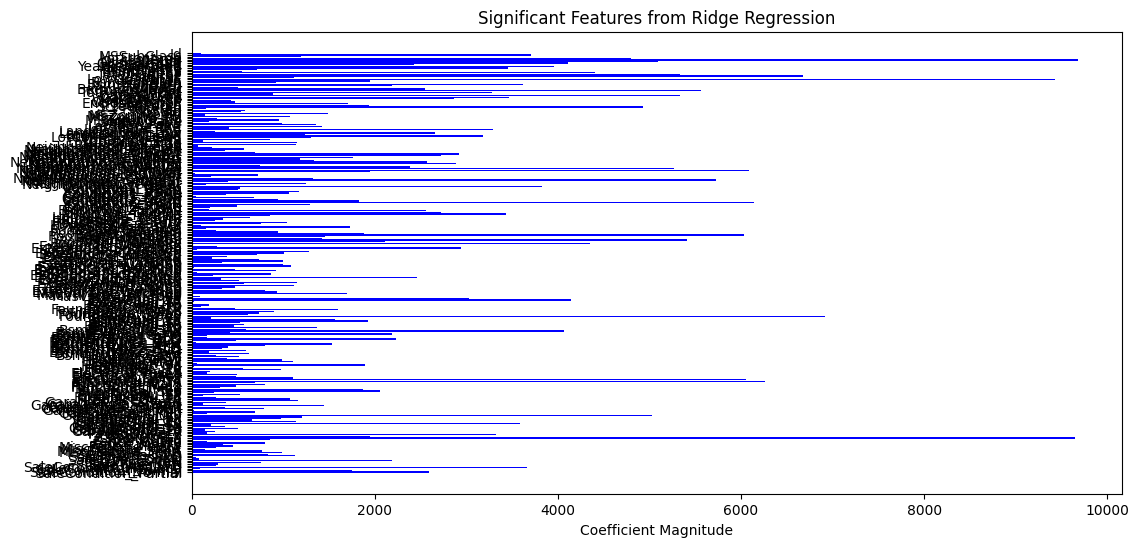

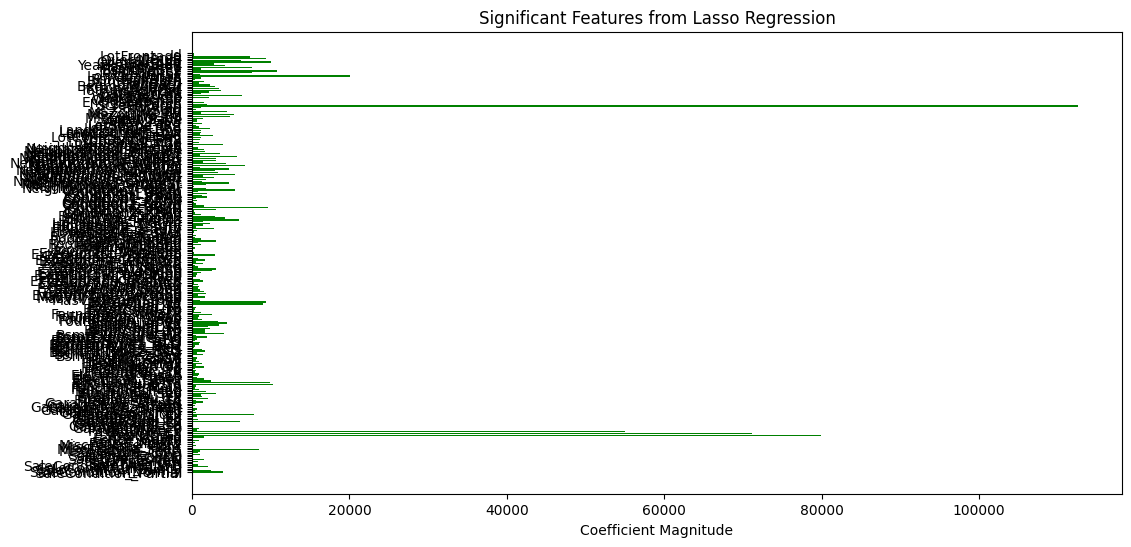

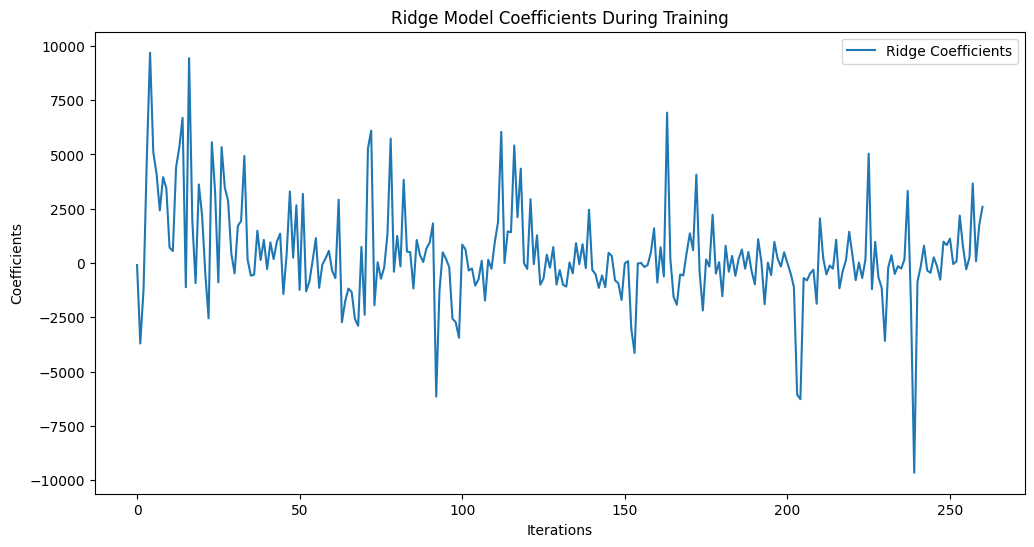

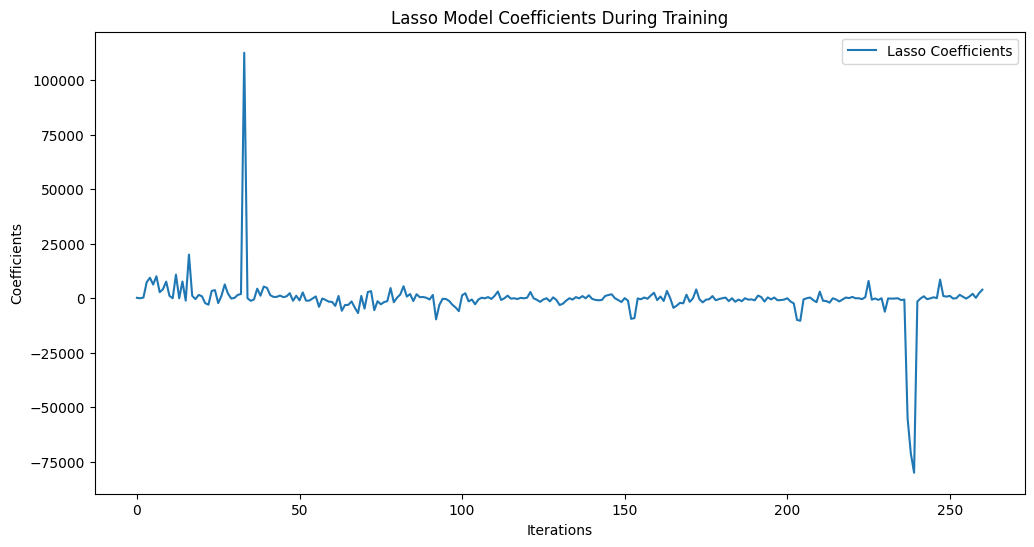

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load data
data = pd.read_csv('train.csv')

# Handle missing values
data.fillna(0, inplace=True)  # Replace missing values with 0 (you can use other strategies)

# Convert categorical variables using one-hot encoding
categorical_cols = data.select_dtypes(include=['object']).columns
data_encoded = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

# Split data
X = data_encoded.drop('SalePrice', axis=1)
y = data_encoded['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Determine the optimal lambda values using cross-validation

# Ridge Regression
ridge_params = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}
ridge_grid = GridSearchCV(Ridge(), ridge_params, cv=5)
ridge_grid.fit(X_train_scaled, y_train)
optimal_lambda_for_ridge = ridge_grid.best_params_['alpha']

# Lasso Regression
lasso_params = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100], 'max_iter': [1000, 5000, 10000]}  # Adjust max_iter values
lasso_grid = GridSearchCV(Lasso(), lasso_params, cv=5)
lasso_grid.fit(X_train_scaled, y_train)
optimal_lambda_for_lasso = lasso_grid.best_params_['alpha']

print("Optimal Lambda for Ridge:", optimal_lambda_for_ridge)
print("Optimal Lambda for Lasso:", optimal_lambda_for_lasso)

# Ridge Regression
ridge_model = Ridge(alpha=optimal_lambda_for_ridge)
ridge_model.fit(X_train_scaled, y_train)
ridge_predictions = ridge_model.predict(X_test_scaled)
ridge_mse = mean_squared_error(y_test, ridge_predictions)
ridge_r2 = r2_score(y_test, ridge_predictions)

# Lasso Regression
lasso_model = Lasso(alpha=optimal_lambda_for_lasso, max_iter=lasso_grid.best_params_['max_iter'])
lasso_model.fit(X_train_scaled, y_train)
lasso_predictions = lasso_model.predict(X_test_scaled)
lasso_mse = mean_squared_error(y_test, lasso_predictions)
lasso_r2 = r2_score(y_test, lasso_predictions)

# Model evaluation and interpretation
print("Ridge Regression:")
print("RMSE:", ridge_mse ** 0.5)
print("R-squared:", ridge_r2)
print("\nLasso Regression:")
print("RMSE:", lasso_mse ** 0.5)
print("R-squared:", lasso_r2)

# Analyze coefficients and feature significance
ridge_coeff_abs = abs(ridge_model.coef_)
lasso_coeff_abs = abs(lasso_model.coef_)

significant_features_ridge = [feature for feature, coefficient in zip(X.columns, ridge_coeff_abs) if coefficient > 0]
significant_features_lasso = [feature for feature, coefficient in zip(X.columns, lasso_coeff_abs) if coefficient > 0]

print("\nSignificant Features from Ridge Regression:")
print(significant_features_ridge)

print("\nSignificant Features from Lasso Regression:")
print(significant_features_lasso)

# Decide which model to choose based on R-squared and significant features
if ridge_r2 > lasso_r2 and len(significant_features_ridge) > len(significant_features_lasso):
    chosen_model = "Ridge"
elif lasso_r2 > ridge_r2 and len(significant_features_lasso) > len(significant_features_ridge):
    chosen_model = "Lasso"
else:
    chosen_model = "No clear winner, consider both"

print("\nChosen Model:", chosen_model)

# Evaluate how well the selected variables describe the price of a house
print("\nModel Descriptiveness:")
print("Ridge MSE:", ridge_mse)
print("Ridge R-squared:", ridge_r2)
print("Lasso MSE:", lasso_mse)
print("Lasso R-squared:", lasso_r2)

# Emphasize the significance of the modeling for management's decision-making
print("\nSignificance for Management:")
if chosen_model != "No clear winner, consider both":
    print(f"The {chosen_model} model provides insights into how house prices vary with key variables.")
else:
    print("Both models offer valuable insights. Consider the variables identified by each.")

# Plot significant features for Ridge and Lasso
plt.figure(figsize=(12, 6))
plt.barh(range(len(significant_features_ridge)), ridge_coeff_abs[ridge_coeff_abs > 0], color='blue', align='center')
plt.yticks(range(len(significant_features_ridge)), significant_features_ridge)
plt.xlabel('Coefficient Magnitude')
plt.title('Significant Features from Ridge Regression')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest coefficient at the top
plt.show()

plt.figure(figsize=(12, 6))
plt.barh(range(len(significant_features_lasso)), lasso_coeff_abs[lasso_coeff_abs > 0], color='green', align='center')
plt.yticks(range(len(significant_features_lasso)), significant_features_lasso)
plt.xlabel('Coefficient Magnitude')
plt.title('Significant Features from Lasso Regression')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest coefficient at the top
plt.show()

# Plot the model coefficients during training for Ridge
plt.figure(figsize=(12, 6))
plt.plot(ridge_model.coef_.T, label='Ridge Coefficients')
plt.xlabel('Iterations')
plt.ylabel('Coefficients')
plt.title('Ridge Model Coefficients During Training')
plt.legend()
plt.show()

# Plot the model coefficients during training for Lasso
plt.figure(figsize=(12, 6))
plt.plot(lasso_model.coef_.T, label='Lasso Coefficients')
plt.xlabel('Iterations')
plt.ylabel('Coefficients')
plt.title('Lasso Model Coefficients During Training')
plt.legend()
plt.show()



In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load data
data = pd.read_csv('train.csv')

# Handle missing values
# You can use other strategies like mean, median, etc.
data.fillna(0, inplace=True)  

# Convert categorical variables using one-hot encoding
categorical_cols = data.select_dtypes(include=['object']).columns
data_encoded = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

# Split data
X = data_encoded.drop('SalePrice', axis=1)
y = data_encoded['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Determine the optimal lambda values using cross-validation
ridge_params = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}
ridge_grid = GridSearchCV(Ridge(), ridge_params, cv=5)
ridge_grid.fit(X_train_scaled, y_train)
optimal_lambda_for_ridge = ridge_grid.best_params_['alpha']

# Lasso Regression
lasso_params = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100], 'max_iter': [1000, 5000, 10000, 20000]}
lasso_grid = GridSearchCV(Lasso(), lasso_params, cv=5)
lasso_grid.fit(X_train_scaled, y_train)
optimal_lambda_for_lasso = lasso_grid.best_params_['alpha']

# Ridge Regression
ridge_model = Ridge(alpha=optimal_lambda_for_ridge)
ridge_model.fit(X_train_scaled, y_train)
ridge_predictions = ridge_model.predict(X_test_scaled)
ridge_mse = mean_squared_error(y_test, ridge_predictions)
ridge_r2 = r2_score(y_test, ridge_predictions)

# Lasso Regression
lasso_model = Lasso(alpha=optimal_lambda_for_lasso, max_iter=lasso_grid.best_params_['max_iter'])
lasso_model.fit(X_train_scaled, y_train)
lasso_predictions = lasso_model.predict(X_test_scaled)
lasso_mse = mean_squared_error(y_test, lasso_predictions)
lasso_r2 = r2_score(y_test, lasso_predictions)



# Model evaluation and interpretation
print("Ridge Regression:")
print("RMSE:", ridge_mse ** 0.5)
print("R-squared:", ridge_r2)
print("\nLasso Regression:")
print("RMSE:", lasso_mse ** 0.5)
print("R-squared:", lasso_r2)

# Analyze coefficients and feature significance
ridge_coeff_abs = abs(ridge_model.coef_)
lasso_coeff_abs = abs(lasso_model.coef_)

significant_features_ridge = [feature for feature, coefficient in zip(X.columns, ridge_coeff_abs) if coefficient > 0]
significant_features_lasso = [feature for feature, coefficient in zip(X.columns, lasso_coeff_abs) if coefficient > 0]

print("\nSignificant Features from Ridge Regression:")
print(significant_features_ridge)

print("\nSignificant Features from Lasso Regression:")
print(significant_features_lasso)

# Decide which model to choose based on R-squared and significant features
if ridge_r2 > lasso_r2 and len(significant_features_ridge) > len(significant_features_lasso):
    chosen_model = "Ridge"
elif lasso_r2 > ridge_r2 and len(significant_features_lasso) > len(significant_features_ridge):
    chosen_model = "Lasso"
else:
    chosen_model = "No clear winner, consider both"

print("\nChosen Model:", chosen_model)

# Evaluate how well the selected variables describe the price of a house
print("\nModel Descriptiveness:")
print("Ridge MSE:", ridge_mse)
print("Ridge R-squared:", ridge_r2)
print("Lasso MSE:", lasso_mse)
print("Lasso R-squared:", lasso_r2)

# Emphasize the significance of the modeling for management's decision-making
print("\nSignificance for Management:")
if chosen_model != "No clear winner, consider both":
    print(f"The {chosen_model} model provides insights into how house prices vary with key variables.")
else:
    print("Both models offer valuable insights. Consider the variables identified by each.")

# Plot significant features for Ridge and Lasso
plt.figure(figsize=(12, 6))
plt.barh(range(len(significant_features_ridge)), ridge_coeff_abs[ridge_coeff_abs > 0], color='blue', align='center')
plt.yticks(range(len(significant_features_ridge)), significant_features_ridge)
plt.xlabel('Coefficient Magnitude')
plt.title('Significant Features from Ridge Regression')
plt.gca().invert_yaxis()  
plt.show()

plt.figure(figsize=(12, 6))
plt.barh(range(len(significant_features_lasso)), lasso_coeff_abs[lasso_coeff_abs > 0], color='green', align='center')
plt.yticks(range(len(significant_features_lasso)), significant_features_lasso)
plt.xlabel('Coefficient Magnitude')
plt.title('Significant Features from Lasso Regression')
plt.gca().invert_yaxis()  
plt.show()



/home/vision/anaconda3/envs/upgrad/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.690e+11, tolerance: 5.374e+08
  model = cd_fast.enet_coordinate_descent(
/home/vision/anaconda3/envs/upgrad/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.312e+11, tolerance: 5.720e+08
  model = cd_fast.enet_coordinate_descent(
/home/vision/anaconda3/envs/upgrad/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider

Subjective Questions

Q1 : What is the optimal value of alpha for ridge and lasso regression?
     What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? 
     What will be the most important predictor variables after the change is implemented?

In [ ]:
# Double the value of alpha for Ridge and Lasso
doubled_alpha_for_ridge = 200
doubled_alpha_for_lasso = 20

# Ridge Regression with doubled alpha
ridge_model_doubled_alpha = Ridge(alpha=doubled_alpha_for_ridge)
ridge_model_doubled_alpha.fit(X_train_scaled, y_train)
ridge_predictions_doubled_alpha = ridge_model_doubled_alpha.predict(X_test_scaled)
ridge_mse_doubled_alpha = mean_squared_error(y_test, ridge_predictions_doubled_alpha)
ridge_r2_doubled_alpha = r2_score(y_test, ridge_predictions_doubled_alpha)

# Lasso Regression with doubled alpha
lasso_model_doubled_alpha = Lasso(alpha=doubled_alpha_for_lasso, max_iter=lasso_grid.best_params_['max_iter'])
lasso_model_doubled_alpha.fit(X_train_scaled, y_train)
lasso_predictions_doubled_alpha = lasso_model_doubled_alpha.predict(X_test_scaled)
lasso_mse_doubled_alpha = mean_squared_error(y_test, lasso_predictions_doubled_alpha)
lasso_r2_doubled_alpha = r2_score(y_test, lasso_predictions_doubled_alpha)

# Model evaluation and interpretation for models with doubled alpha
print("\nModel Performance with Doubled Alpha:")
print("Ridge Regression (Doubled Alpha):")
print("RMSE:", ridge_mse_doubled_alpha ** 0.5)
print("R-squared:", ridge_r2_doubled_alpha)
print("\nLasso Regression (Doubled Alpha):")
print("RMSE:", lasso_mse_doubled_alpha ** 0.5)
print("R-squared:", lasso_r2_doubled_alpha)

# Analyze coefficients and feature significance for models with doubled alpha
ridge_coeff_abs_doubled_alpha = abs(ridge_model_doubled_alpha.coef_)
lasso_coeff_abs_doubled_alpha = abs(lasso_model_doubled_alpha.coef_)

significant_features_ridge_doubled_alpha = [feature for feature, coefficient in zip(X.columns, ridge_coeff_abs_doubled_alpha) if coefficient > 0]
significant_features_lasso_doubled_alpha = [feature for feature, coefficient in zip(X.columns, lasso_coeff_abs_doubled_alpha) if coefficient > 0]

print("\nSignificant Features from Ridge Regression (Doubled Alpha):")
print(significant_features_ridge_doubled_alpha)

print("\nSignificant Features from Lasso Regression (Doubled Alpha):")
print(significant_features_lasso_doubled_alpha)

# Decide which model to choose based on R-squared and significant features
if ridge_r2 > lasso_r2 and len(significant_features_ridge) > len(significant_features_lasso):
    chosen_model = "Ridge"
elif lasso_r2 > ridge_r2 and len(significant_features_lasso) > len(significant_features_ridge):
    chosen_model = "Lasso"
else:
    chosen_model = "No clear winner, consider both"

print("\nChosen Model:", chosen_model)

# Evaluate how well the selected variables describe the price of a house
print("\nModel Descriptiveness:")
print("Ridge MSE:", ridge_mse)
print("Ridge R-squared:", ridge_r2)
print("Lasso MSE:", lasso_mse)
print("Lasso R-squared:", lasso_r2)

# Emphasize the significance of the modeling for management's decision-making
print("\nSignificance for Management:")
if chosen_model != "No clear winner, consider both":
    print(f"The {chosen_model} model provides insights into how house prices vary with key variables.")
else:
    print("Both models offer valuable insights. Consider the variables identified by each.")

# Plot significant features for Ridge and Lasso
plt.figure(figsize=(12, 6))
plt.barh(range(len(significant_features_ridge)), ridge_coeff_abs[ridge_coeff_abs > 0], color='blue', align='center')
plt.yticks(range(len(significant_features_ridge)), significant_features_ridge)
plt.xlabel('Coefficient Magnitude')
plt.title('Significant Features from Ridge Regression')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest coefficient at the top
plt.show()

plt.figure(figsize=(12, 6))
plt.barh(range(len(significant_features_lasso)), lasso_coeff_abs[lasso_coeff_abs > 0], color='green', align='center')
plt.yticks(range(len(significant_features_lasso)), significant_features_lasso)
plt.xlabel('Coefficient Magnitude')
plt.title('Significant Features from Lasso Regression')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest coefficient at the top
plt.show()

# Plot the model coefficients during training for Ridge
plt.figure(figsize=(12, 6))
plt.plot(ridge_model.coef_.T, label='Ridge Coefficients')
plt.xlabel('Iterations')
plt.ylabel('Coefficients')
plt.title('Ridge Model Coefficients During Training')
plt.legend()
plt.show()

# Plot the model coefficients during training for Lasso
plt.figure(figsize=(12, 6))
plt.plot(lasso_model.coef_.T, label='Lasso Coefficients')
plt.xlabel('Iterations')
plt.ylabel('Coefficients')
plt.title('Lasso Model Coefficients During Training')
plt.legend()
plt.show()



Q3 : After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# Load data
data = pd.read_csv('train.csv')

# Handle missing values (replace with 0 for simplicity)
data.fillna(0, inplace=True)

# Convert categorical variables using one-hot encoding
categorical_cols = data.select_dtypes(include=['object']).columns
data_encoded = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

# Split data
X = data_encoded.drop('SalePrice', axis=1)
y = data_encoded['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Lasso model to identify important features
lasso_model = Lasso(alpha=10)  # Use the optimal alpha identified previously
lasso_model.fit(X_train_scaled, y_train)

# Get the indices of the top 5 important features
top_5_indices = lasso_model.coef_.argsort()[-5:][::-1]

# Get the names of the top 5 important features
top_5_features = X.columns[top_5_indices]

print("Top 5 most important predictor variables from Lasso model:")
print(top_5_features)

# Exclude the top 5 features from the dataset
X_train_without_top_5 = X_train_scaled[:, ~top_5_indices]
X_test_without_top_5 = X_test_scaled[:, ~top_5_indices]

# Train a new Lasso model without the top 5 features
lasso_model_without_top_5 = Lasso(alpha=10)  # Use the optimal alpha identified previously
lasso_model_without_top_5.fit(X_train_without_top_5, y_train)

# Predict and evaluate the model
lasso_predictions_without_top_5 = lasso_model_without_top_5.predict(X_test_without_top_5)
lasso_mse_without_top_5 = mean_squared_error(y_test, lasso_predictions_without_top_5)

print("\nLasso Regression without top 5 features:")
print("RMSE:", lasso_mse_without_top_5 ** 0.5)


Q4: How can you make sure that a model is robust and generalisable? What are the implications of the same for the accuracy of the model and why?

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler

# Load and preprocess data
data = pd.read_csv('train.csv')
data.fillna(0, inplace=True)
categorical_cols = data.select_dtypes(include=['object']).columns
data_encoded = pd.get_dummies(data, columns=categorical_cols, drop_first=True)
X = data_encoded.drop('SalePrice', axis=1)
y = data_encoded['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Ridge Regression with Cross-Validation
ridge_model = Ridge(alpha=100)
ridge_cv_scores = cross_val_score(ridge_model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
ridge_rmse_scores = (-ridge_cv_scores)**0.5
ridge_mean_rmse = ridge_rmse_scores.mean()

# Evaluate on the test set
ridge_model.fit(X_train_scaled, y_train)
ridge_test_predictions = ridge_model.predict(X_test_scaled)
ridge_test_rmse = mean_squared_error(y_test, ridge_test_predictions, squared=False)

print("Ridge Cross-Validation RMSE:", ridge_mean_rmse)
print("Ridge Test RMSE:", ridge_test_rmse)


In [ ]:
!pip freeze> requirements.txt